In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-sales/index.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
coffee = pd.read_csv('/kaggle/input/coffee-sales/index.csv')

In [4]:
# Date and time
coffee['datetime'] = pd.to_datetime(coffee['datetime'])
coffee['month'] = coffee['datetime'].apply(lambda date: date.month)
coffee['day'] = coffee['datetime'].apply(lambda date: date.day)
coffee['hour'] = coffee['datetime'].apply(lambda date: date.hour)
coffee['day of week'] = coffee['datetime'].dt.day_name()

In [5]:
# Adding vending machine ingredients

coffee['coffee'] = np.zeros(len(coffee))
coffee['milk powder'] = np.zeros(len(coffee))
coffee['hot chocolate'] = np.zeros(len(coffee))
coffee['cocoa powder'] = np.zeros(len(coffee))

coffee.loc[coffee['coffee_name'] == 'Americano', 'coffee'] = 1
coffee.loc[coffee['coffee_name'] == 'Americano with Milk', ['coffee', 'milk powder']] = [1, 1]
coffee.loc[coffee['coffee_name'] == 'Latte', ['coffee', 'milk powder']] = [1, 4]
coffee.loc[coffee['coffee_name'] == 'Cappuccino', ['coffee', 'milk powder']] = [1, 2]
coffee.loc[coffee['coffee_name'] == 'Cortado', ['coffee', 'milk powder']] = [1, 1]
coffee.loc[coffee['coffee_name'] == 'Hot Chocolate', ['hot chocolate', 'milk powder']] = [1, 4]
coffee.loc[coffee['coffee_name'] == 'Espresso', 'coffee'] = 1
coffee.loc[coffee['coffee_name'] == 'Cocoa', ['cocoa powder', 'milk powder']] = [1, 4]

coffee.head() 

,date,datetime,cash_type,card,money,coffee_name,month,day,hour,day of week,coffee,milk powder,hot chocolate,cocoa powder
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,3,1,10,Friday,1.0,4.0,0.0,0.0
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,1,12,Friday,0.0,4.0,1.0,0.0
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,1,12,Friday,0.0,4.0,1.0,0.0
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,3,1,13,Friday,1.0,0.0,0.0,0.0
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,3,1,13,Friday,1.0,4.0,0.0,0.0


In [6]:
# Create dummies for types of coffee
coffee_type = pd.get_dummies(coffee['coffee_name'], dtype=float, drop_first=True)

coffee = pd.concat([coffee, coffee_type], axis=1)

In [7]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | / done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 76.7 MB/s eta 0:

In [8]:
from sklearn.preprocessing import LabelEncoder

coffee_clean = coffee.drop(columns = ['date', 'datetime', 'card', 'day of week', 'milk powder',
       'hot chocolate', 'cocoa powder'])

label_encoder = LabelEncoder()
coffee_clean['cash_type'] = label_encoder.fit_transform(coffee_clean['cash_type'])

I'm predicting coffee consumption so the company knows when to refill the vending machine (and how much coffee they need to order for the next month). It should be done for every ingredient.


In [9]:
from pycaret.regression import *

In [10]:
coffee_clean = coffee_clean.groupby(['month', 'day']).agg({
    'coffee': 'count'
}).reset_index()

train = coffee_clean[coffee_clean['month'] < 6]
test = coffee_clean[coffee_clean['month'] == 6]

# check shape
train.shape, test.shape

((89, 3), (30, 3))

In [11]:
# initialize setup
s = setup(
    data = train, 
    test_data = test, 
    target = 'coffee', 
    fold_strategy = 'timeseries', 
    numeric_features = ['month','day'], 
    fold = 6, 
    transform_target = False, 
    session_id = 123,
    data_split_shuffle=False,
    fold_shuffle=False
)

,Description,Value
0,Session id,123
1,Target,coffee
2,Target type,Regression
3,Original data shape,"(119, 3)"
4,Transformed data shape,"(119, 3)"
5,Transformed train set shape,"(89, 3)"
6,Transformed test set shape,"(30, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [12]:
best_model = compare_models(sort = 'MSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,3.0299,13.6888,3.6759,-0.6601,0.5000,0.6363,0.1100
dummy,Dummy Regressor,3.0292,13.8133,3.5616,-0.5915,0.4783,0.6194,0.0217
br,Bayesian Ridge,3.0240,13.8617,3.5435,-0.5695,0.4729,0.6035,0.0183
et,Extra Trees Regressor,2.9547,13.8838,3.6894,-0.8181,0.5270,0.6207,0.0817
lasso,Lasso Regression,3.0133,14.2878,3.5789,-0.6124,0.4722,0.5821,0.0167
llar,Lasso Least Angle Regression,3.0133,14.2878,3.5789,-0.6124,0.4722,0.5821,0.0150
gbr,Gradient Boosting Regressor,3.0491,14.5006,3.7851,-0.8878,0.5582,0.6580,0.0433
en,Elastic Net,3.0360,14.5156,3.6078,-0.6428,0.4749,0.5812,0.0250
ridge,Ridge Regression,3.0239,14.5223,3.6559,-0.6335,0.4760,0.5599,0.0250
lr,Linear Regression,3.0358,14.6738,3.6748,-0.6454,0.4786,0.5590,0.9283


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [13]:
# Make a dataframe of dates and hours for validating predictions
validation_dates = pd.date_range(start = '2024-07-01', end = '2024-07-26', freq = 'D')
val_df = pd.DataFrame()
val_df['month'] = [i.month for i in validation_dates]
val_df['day'] = [i.day for i in validation_dates]
val_df.head()

,month,day
0,7,1
1,7,2
2,7,3
3,7,4
4,7,5


In [14]:
# Predictions
predictions_val = predict_model(best_model, data=val_df)
predictions_val.head()

,month,day,prediction_label
0,7,1,6.30
1,7,2,6.30
2,7,3,4.71
3,7,4,4.77
4,7,5,8.08


In [15]:
print(predictions_val['prediction_label'].sum())

227.32999999999998


In [16]:
# Converting to a larger integer type to avoid overflow
predictions_val['month'] = predictions_val['month'].astype('int32')
predictions_val['day'] = predictions_val['day'].astype('int32')

# Create a new column for continuous days
coffee_clean['continuous_day'] = coffee_clean['month'] * 30 + coffee_clean['day']
predictions_val['continuous_day'] = predictions_val['month'] * 30 + predictions_val['day']

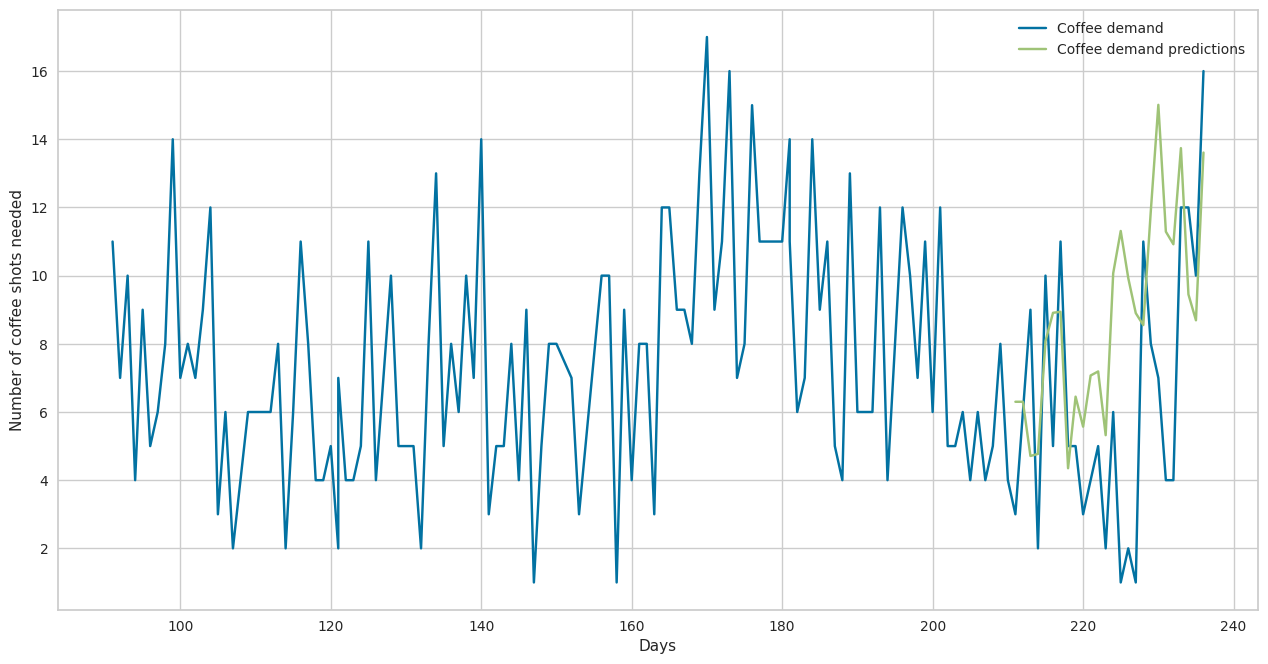

In [17]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(coffee_clean['continuous_day'], coffee_clean['coffee'], label='Coffee demand')
ax.plot(predictions_val['continuous_day'], predictions_val['prediction_label'], label='Coffee demand predictions')
plt.xlabel('Days')
plt.ylabel('Number of coffee shots needed')
plt.grid(True)
ax.legend(loc=0)

In [18]:
print(coffee[coffee['month']==7]['coffee'].sum())
print(predictions_val['prediction_label'].sum())

149.0
227.32999999999998


This model predicted more coffee consumption, so it still needs some fine tunning, or Random Forest Regressor isn't most suitable for this kind of data.

Let's try something else.


In [19]:
best_model2 = compare_models(sort = 'RMSLE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,3.0133,14.2878,3.5789,-0.6124,0.4722,0.5821,0.0250
llar,Lasso Least Angle Regression,3.0133,14.2878,3.5789,-0.6124,0.4722,0.5821,0.0250
br,Bayesian Ridge,3.0240,13.8617,3.5435,-0.5695,0.4729,0.6035,0.0250
en,Elastic Net,3.0360,14.5156,3.6078,-0.6428,0.4749,0.5812,0.0267
ridge,Ridge Regression,3.0239,14.5223,3.6559,-0.6335,0.4760,0.5599,0.0250
dummy,Dummy Regressor,3.0292,13.8133,3.5616,-0.5915,0.4783,0.6194,0.0217
lar,Least Angle Regression,3.0358,14.6738,3.6748,-0.6454,0.4786,0.5590,0.0250
lr,Linear Regression,3.0358,14.6738,3.6748,-0.6454,0.4786,0.5590,0.0250
omp,Orthogonal Matching Pursuit,3.0709,14.8261,3.6508,-0.6875,0.4797,0.5811,0.0250
lightgbm,Light Gradient Boosting Machine,3.1118,14.8619,3.6523,-0.7000,0.4885,0.6167,0.0300


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [20]:
# Make predictions
predictions_val2 = predict_model(best_model2, data=val_df)
predictions_val2.head()

,month,day,prediction_label
0,7,1,7.076041
1,7,2,7.104930
2,7,3,7.133820
3,7,4,7.162710
4,7,5,7.191600


In [21]:
# Converting to a larger integer type to avoid overflow
predictions_val2['month'] = predictions_val2['month'].astype('int32')
predictions_val2['day'] = predictions_val2['day'].astype('int32')

# Create a new column for continuous days
coffee_clean['continuous_day'] = coffee_clean['month'] * 30 + coffee_clean['day']
predictions_val2['continuous_day'] = predictions_val2['month'] * 30 + predictions_val2['day']


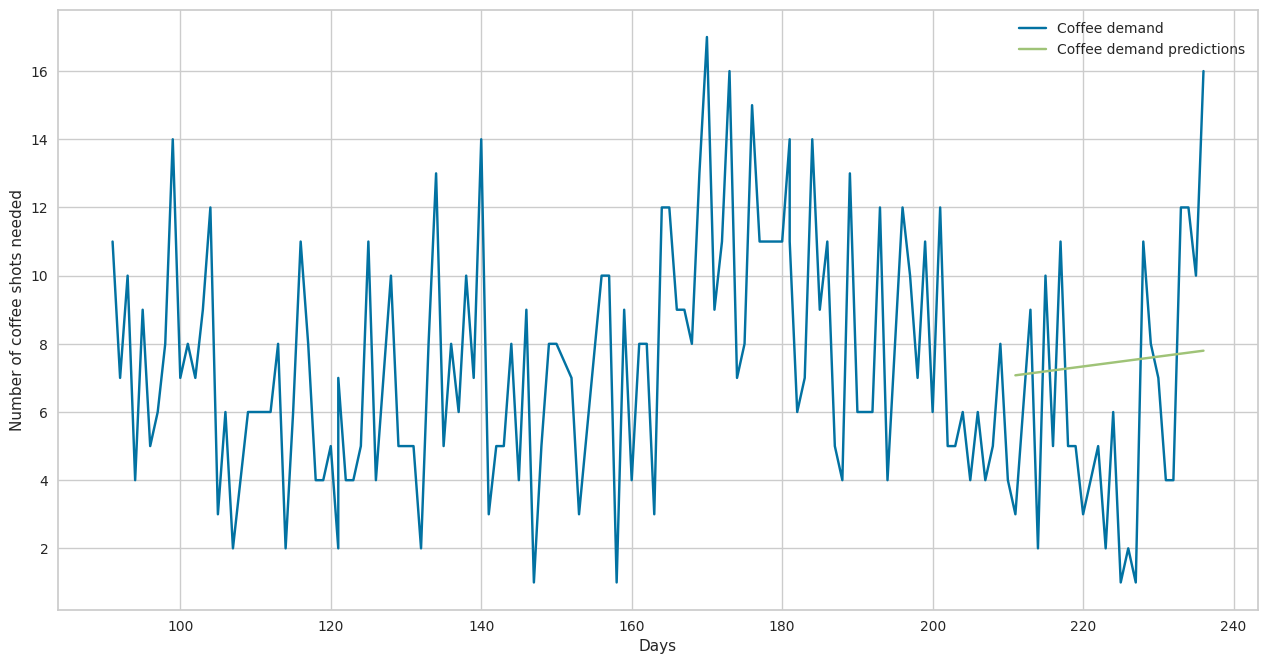

In [22]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(coffee_clean['continuous_day'], coffee_clean['coffee'], label='Coffee demand')
ax.plot(predictions_val2['continuous_day'], predictions_val2['prediction_label'], label='Coffee demand predictions')
plt.xlabel('Days')
plt.ylabel('Number of coffee shots needed')
plt.grid(True)
ax.legend(loc=0)

In [23]:
print(coffee[coffee['month']==7]['coffee'].sum())
print(predictions_val2['prediction_label'].sum())

149.0
193.36624994147118
